# Freelance Pay Data Analysis and Forecasting

#### Import the data and view first 5 Rows

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
from scipy import stats
import seaborn as sns
from io import StringIO

In [2]:
# Define the path to the cleaned data
cleaned_data_path = '../data/earnings_data.csv'
holidays_2024_data_path = '../data/holidays_2024.csv'
holidays_2023_data_path = '../data/holidays_2023.csv'
earnings_with_holidays_2024_path = '../data/2024_earnings_against_holiday_data.csv'
earnings_with_holidays_2023_path = '../data/2023_earnings_against_holiday_data.csv'

# Load the data
df_cleaned = pd.read_csv(cleaned_data_path)
holidays_2024_df = pd.read_csv(holidays_2024_data_path)
holidays_2023_df = pd.read_csv(holidays_2023_data_path)
earnings_with_holidays_2024_df = pd.read_csv(earnings_with_holidays_2024_path)
earnings_with_holidays_2023_df = pd.read_csv(earnings_with_holidays_2023_path)

# Display the first few rows
print(df_cleaned.head())

                                      Period  Amount Status
0  2024-12-20 00:00:00 - 2024-12-26 23:59:59  153.55   Paid
1  2024-12-13 00:00:00 - 2024-12-19 23:59:59  258.39   Paid
2  2024-12-06 00:00:00 - 2024-12-12 23:59:59  272.22   Paid
3  2024-11-29 00:00:00 - 2024-12-05 23:59:59  205.11   Paid
4  2024-11-22 00:00:00 - 2024-11-28 23:59:59  310.00   Paid


#### Add columns with start and end dates for clear time period distinction

In [3]:
# Split Period into Start_Date and End_Date
df_cleaned[['Start_Date', 'End_Date']] = df_cleaned['Period'].str.split(' - ', expand=True)
df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned['Start_Date'])
df_cleaned['End_Date'] = pd.to_datetime(df_cleaned['End_Date'])
# df_cleaned.drop("Day_of_Week", axis='columns')


# df_split_dates = df_cleaned.drop("Day_of_Week", axis='columns')
# df_split_dates.to_csv('../data/earnings_data_with_date_split.csv', index=False)

In [4]:
print(df_cleaned.head())

                                      Period  Amount Status Start_Date  \
0  2024-12-20 00:00:00 - 2024-12-26 23:59:59  153.55   Paid 2024-12-20   
1  2024-12-13 00:00:00 - 2024-12-19 23:59:59  258.39   Paid 2024-12-13   
2  2024-12-06 00:00:00 - 2024-12-12 23:59:59  272.22   Paid 2024-12-06   
3  2024-11-29 00:00:00 - 2024-12-05 23:59:59  205.11   Paid 2024-11-29   
4  2024-11-22 00:00:00 - 2024-11-28 23:59:59  310.00   Paid 2024-11-22   

             End_Date  
0 2024-12-26 23:59:59  
1 2024-12-19 23:59:59  
2 2024-12-12 23:59:59  
3 2024-12-05 23:59:59  
4 2024-11-28 23:59:59  


- ### Basic Statistical Summaries

##### Summary Stats

In [5]:
print(df_cleaned['Amount'].describe())

count    170.000000
mean      83.726412
std       74.484521
min        2.520000
25%       24.960000
50%       57.460000
75%      135.352500
max      310.000000
Name: Amount, dtype: float64


##### Date Range

In [6]:
print(df_cleaned['Start_Date'].min(), df_cleaned['Start_Date'].max())

2021-05-03 08:49:14 2024-12-20 00:00:00


- ### Visualization

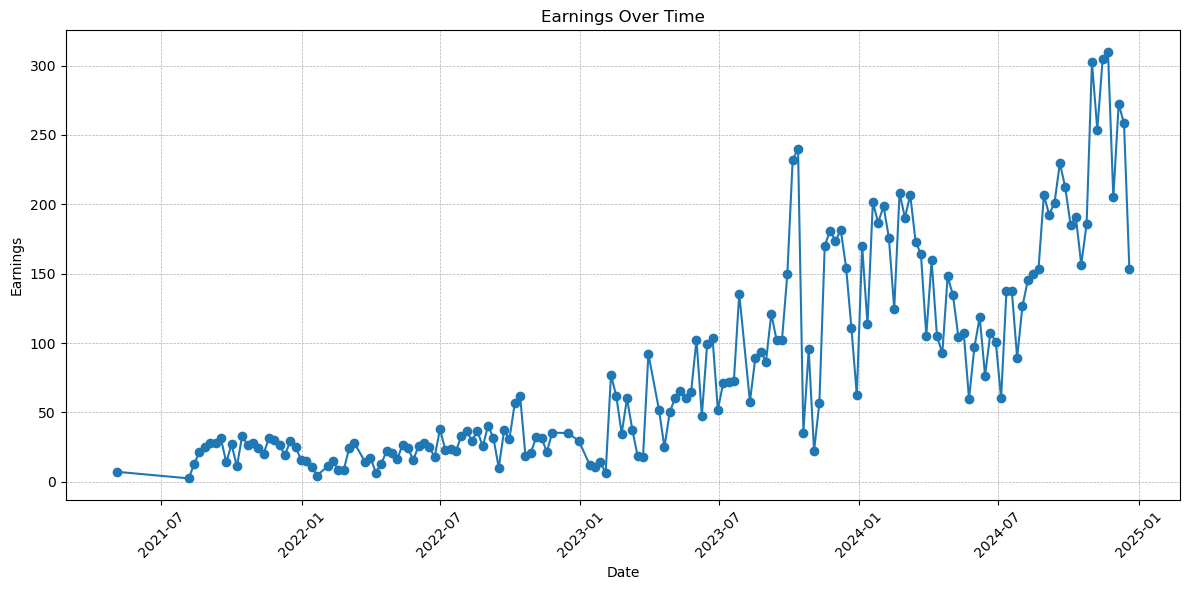

In [7]:
# Plot earnings (Amount) over time (using Start_Date or End_Date) to see if there are upward or downward trends, seasonal fluctuations, or regular patterns.

# Sort by date to ensure a continuous timeline
df_cleaned = df_cleaned.sort_values('Start_Date')

plt.figure(figsize=(12,6))
plt.plot(df_cleaned['Start_Date'], df_cleaned['Amount'], marker='o')
plt.title('Earnings Over Time')
plt.xlabel('Date')
plt.ylabel('Earnings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

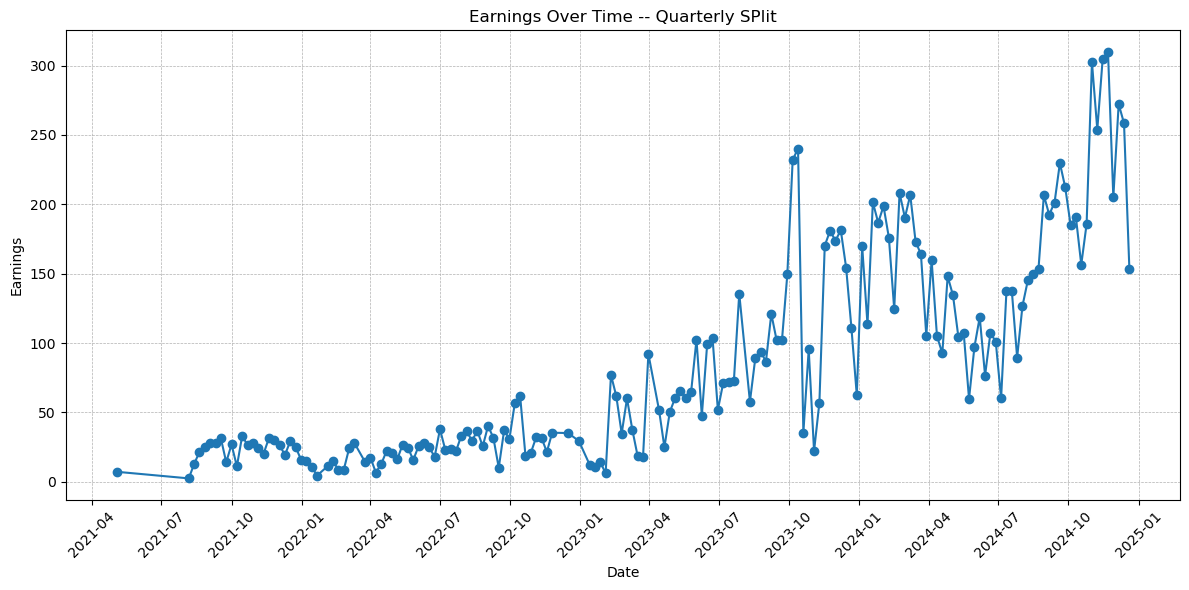

In [8]:
# Quarterly Trends

plt.figure(figsize=(12,6))
plt.plot(df_cleaned['Start_Date'], df_cleaned['Amount'], marker='o')
plt.title('Earnings Over Time -- Quarterly SPlit')
plt.xlabel('Date')
plt.ylabel('Earnings')

# Use MonthLocator to set quarterly ticks: January, April, July, October
quarter_months = [1, 4, 7, 10]
quarter_locator = mdates.MonthLocator(bymonth=quarter_months)

# Set the date formatter to show Year-Month or Year-Qtr format
quarter_formatter = mdates.DateFormatter('%Y-%m')

ax = plt.gca()
ax.xaxis.set_major_locator(quarter_locator)
ax.xaxis.set_major_formatter(quarter_formatter)

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(linestyle='--', linewidth=0.5)
plt.show()


##### Select the Year to find Data for a specific Year

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from ipywidgets import interact, Dropdown

# Ensure df_cleaned is already loaded and Start_Date is datetime
# Example: df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned['Start_Date'])

# Extract the year and month for convenience
df_cleaned['Year'] = df_cleaned['End_Date'].dt.year
df_cleaned['Month'] = df_cleaned['End_Date'].dt.month

# Get the list of unique years
unique_years = sorted(df_cleaned['Year'].unique())

def plot_yearly_monthly_earnings(year):
    # Filter for the selected year
    df_year = df_cleaned[df_cleaned['Year'] == year]
    
    # Group by month and sum up Amount
    monthly_earnings_year = df_year.groupby('Month', as_index=False)['Amount'].sum()
    
    # Convert month numbers to names
    monthly_earnings_year['Month_Name'] = monthly_earnings_year['Month'].apply(lambda x: calendar.month_name[x])
    
    # Sort by month number to ensure correct order
    monthly_earnings_year = monthly_earnings_year.sort_values('Month')
    
    # Plot
    plt.figure(figsize=(12,6))
    plt.bar(monthly_earnings_year['Month_Name'], monthly_earnings_year['Amount'], color='skyblue')
    plt.title(f'Monthly Earnings for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Earnings')
    plt.xticks(rotation=45)
    plt.grid(linestyle='--', linewidth=0.5, axis='y')
    plt.tight_layout()
    plt.show()

# Create a dropdown for selecting the year
year_dropdown = Dropdown(options=unique_years, description='Select Year:', value=unique_years[0])

# Use interact to update the plot when the dropdown selection changes
interact(plot_yearly_monthly_earnings, year=year_dropdown);

interactive(children=(Dropdown(description='Select Year:', options=(2021, 2022, 2023, 2024), value=2021), Outp…

##### Monthly Data for all the Years Combined

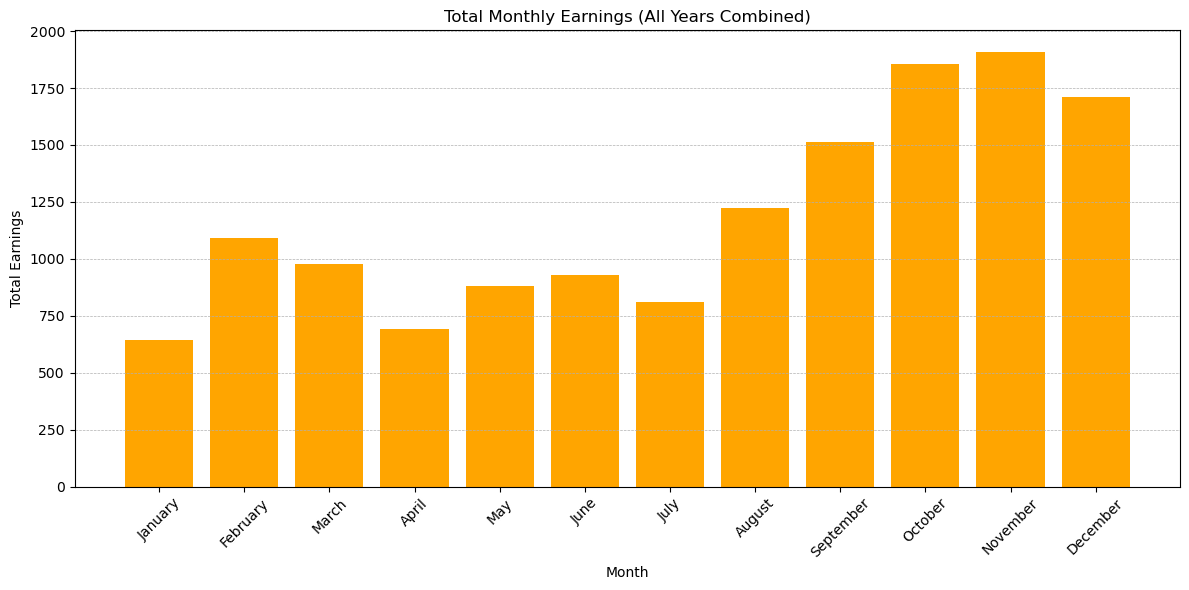

In [10]:
# Group by month only (across all years)
monthly_earnings_all = df_cleaned.groupby('Month', as_index=False)['Amount'].sum()

# Convert month numbers to month names
monthly_earnings_all['Month_Name'] = monthly_earnings_all['Month'].apply(lambda x: calendar.month_name[x])
monthly_earnings_all = monthly_earnings_all.sort_values('Month')

# Plot the total monthly earnings combined over all data
plt.figure(figsize=(12,6))
plt.bar(monthly_earnings_all['Month_Name'], monthly_earnings_all['Amount'], color='orange')
plt.title('Total Monthly Earnings (All Years Combined)')
plt.xlabel('Month')
plt.ylabel('Total Earnings')
plt.xticks(rotation=45)
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.tight_layout()
plt.show()

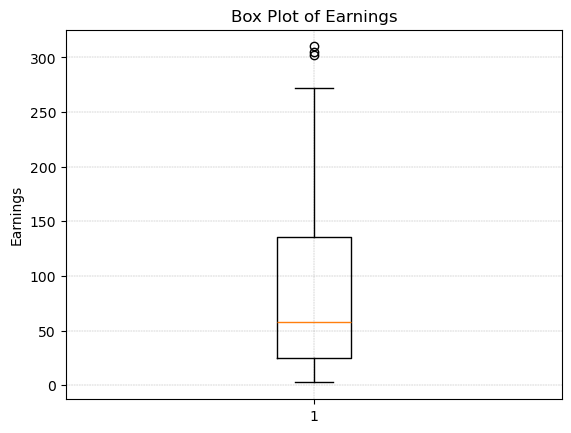

In [11]:
# check for outliers
plt.boxplot(df_cleaned['Amount'])
plt.title('Box Plot of Earnings')
plt.ylabel('Earnings')
plt.grid(linestyle='--', linewidth= 0.35)
plt.show()

- #### 2024 Earnings against the Holidays

In [12]:
# #-------------------------------------------
# # Assume df_cleaned is already loaded and contains:
# # - Period, Amount, Status
# # If not, load it:
# # df_cleaned = pd.read_csv('data/earnings_data.csv')

# # Convert Period into Start_Date and End_Date if not done
# if 'Start_Date' not in df_cleaned.columns or 'End_Date' not in df_cleaned.columns:
#     df_cleaned[['Start_Date', 'End_Date']] = df_cleaned['Period'].str.split(' - ', expand=True)
#     df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned['Start_Date'])
#     df_cleaned['End_Date'] = pd.to_datetime(df_cleaned['End_Date'])

# # Add Year and Month columns if not already present
# if 'Year' not in df_cleaned.columns:
#     df_cleaned['Year'] = df_cleaned['Start_Date'].dt.year
# if 'Month' not in df_cleaned.columns:
#     df_cleaned['Month'] = df_cleaned['Start_Date'].dt.month

# # Filter the data to only include rows from 2024
# df_cleaned = df_cleaned[df_cleaned['Year'] == 2024]

# #-------------------------------------------
# # Assume holidays_2024_df is loaded:
# # holidays_2024_df = pd.read_csv('data/holidays.csv')
# # Ensure holidays_2024_df['Date'] is datetime
# holidays_2024_df['Date'] = pd.to_datetime(holidays_2024_df['Date'])

# def holidays_in_period(start, end, holidays):
#     mask = (holidays['Date'] >= start) & (holidays['Date'] <= end)
#     holiday_rows = holidays[mask]
#     return holiday_rows['Holiday_Name'].tolist()

# # Create holiday_data dataframe to store holiday info
# holiday_data = df_cleaned[['Start_Date', 'End_Date']].copy()

# holiday_data['Holidays_In_Interval'] = holiday_data.apply(
#     lambda row: holidays_in_period(row['Start_Date'], row['End_Date'], holidays_2024_df), axis=1
# )

# holiday_data['Has_Holiday'] = holiday_data['Holidays_In_Interval'].apply(lambda x: len(x) > 0)

# # Select required columns from df_cleaned
# selected_df = df_cleaned[['Amount', 'Start_Date', 'End_Date', 'Year', 'Month']].copy()

# # Join holiday_data to selected_df
# final_df = selected_df.join(holiday_data[['Holidays_In_Interval', 'Has_Holiday']])

# print(final_df.head())

    Amount Start_Date            End_Date  Year  Month  \
51   62.34 2023-12-29 2024-01-04 23:59:59  2024      1   
50  170.04 2024-01-05 2024-01-11 23:59:59  2024      1   
49  113.46 2024-01-12 2024-01-18 23:59:59  2024      1   
48  201.50 2024-01-19 2024-01-25 23:59:59  2024      1   
47  186.81 2024-01-26 2024-02-01 23:59:59  2024      2   

            Holidays_In_Interval  Has_Holiday  
51              [New Year's Day]         True  
50                            []        False  
49  [Martin Luther King Jr. Day]         True  
48                            []        False  
47                            []        False  


In [13]:
# #-------------------------------------------
# # Assume df_cleaned is already loaded and contains:
# # - Period, Amount, Status
# # If not, load it:
# # df_cleaned = pd.read_csv('data/earnings_data.csv')

# # Convert Period into Start_Date and End_Date if not done
# if 'Start_Date' not in df_cleaned.columns or 'End_Date' not in df_cleaned.columns:
#     df_cleaned[['Start_Date', 'End_Date']] = df_cleaned['Period'].str.split(' - ', expand=True)
#     df_cleaned['Start_Date'] = pd.to_datetime(df_cleaned['Start_Date'])
#     df_cleaned['End_Date'] = pd.to_datetime(df_cleaned['End_Date'])

# # Add Year and Month columns if not already present
# if 'Year' not in df_cleaned.columns:
#     df_cleaned['Year'] = df_cleaned['Start_Date'].dt.year
# if 'Month' not in df_cleaned.columns:
#     df_cleaned['Month'] = df_cleaned['Start_Date'].dt.month

# # Filter the data to only include rows from 2023
# df_2023 = df_cleaned[df_cleaned['Year'] == 2023]

# #-------------------------------------------
# # Assume holidays_2023_df is loaded:
# # Load 2023 holidays
# # holidays_2023_df = pd.read_csv('data/holidays_2023.csv')
# # Ensure holidays_2023_df['Date'] is datetime
# holidays_2023_df['Date'] = pd.to_datetime(holidays_2023_df['Date'])

# def holidays_in_period(start, end, holidays):
#     mask = (holidays['Date'] >= start) & (holidays['Date'] <= end)
#     holiday_rows = holidays[mask]
#     return holiday_rows['Holiday_Name'].tolist()

# # Create holiday_data dataframe to store holiday info
# holiday_info_2023 = df_2023[['Start_Date', 'End_Date']].copy()

# holiday_info_2023['Holidays_In_Interval'] = holiday_info_2023.apply(
#     lambda row: holidays_in_period(row['Start_Date'], row['End_Date'], holidays_2023_df), axis=1
# )

# holiday_info_2023['Has_Holiday'] = holiday_info_2023['Holidays_In_Interval'].apply(lambda x: len(x) > 0)

# # Select required columns from df_2023
# earnings_selected_2023 = df_2023[['Amount', 'Start_Date', 'End_Date', 'Year', 'Month']].copy()

# # Join holiday_info_2023 to earnings_selected_2023
# earnings_with_holidays_2023_df = earnings_selected_2023.join(holiday_info_2023[['Holidays_In_Interval', 'Has_Holiday']])

# print(earnings_with_holidays_2023_df.head())

     Amount Start_Date            End_Date  Year  Month  \
100   29.43 2022-12-30 2023-01-12 23:59:59  2023      1   
99    12.46 2023-01-13 2023-01-19 23:59:59  2023      1   
98    10.77 2023-01-20 2023-01-26 23:59:59  2023      1   
97    14.32 2023-01-27 2023-02-02 23:59:59  2023      2   
96     6.16 2023-02-03 2023-02-09 23:59:59  2023      2   

             Holidays_In_Interval  Has_Holiday  
100              [New Year's Day]         True  
99   [Martin Luther King Jr. Day]         True  
98                             []        False  
97                             []        False  
96                             []        False  


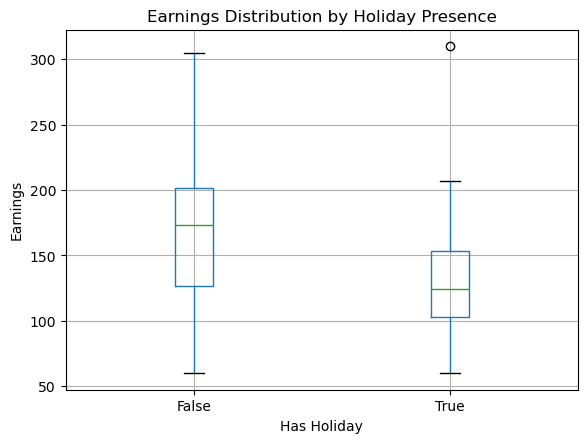

In [14]:
earnings_with_holidays_2024_df.boxplot(column='Amount', by='Has_Holiday')
plt.title('Earnings Distribution by Holiday Presence')
plt.suptitle('')
plt.xlabel('Has Holiday')
plt.ylabel('Earnings')
plt.show()

- #### 2023 Earnings against the Holidays

In [22]:
# # Filter the data to only include rows from 2023
# df_cleaned = df_cleaned[df_cleaned['Year'] == 2023]

# #-------------------------------------------
# # Assume holidays_2023_df is loaded:
# # holidays_2023_df = pd.read_csv('data/holidays.csv')
# # Ensure holidays_2023_df['Date'] is datetime
# holidays_2023_df['Date'] = pd.to_datetime(holidays_2023_df['Date'])

# def holidays_in_period(start, end, holidays):
#     mask = (holidays['Date'] >= start) & (holidays['Date'] <= end)
#     holiday_rows = holidays[mask]
#     return holiday_rows['Holiday_Name'].tolist()

# # Create holiday_data dataframe to store holiday info
# holiday_data = df_cleaned[['Start_Date', 'End_Date']].copy()

# holiday_data['Holidays_In_Interval'] = holiday_data.apply(
#     lambda row: holidays_in_period(row['Start_Date'], row['End_Date'], holidays_2023_df), axis=1
# )

# holiday_data['Has_Holiday'] = holiday_data['Holidays_In_Interval'].apply(lambda x: len(x) > 0)

# # Select required columns from df_cleaned
# selected_df = df_cleaned[['Amount', 'Start_Date', 'End_Date', 'Year', 'Month']].copy()

# # Join holiday_data to selected_df
# final_df = selected_df.join(holiday_data[['Holidays_In_Interval', 'Has_Holiday']])

# print(final_df.head())


In [15]:
earnings_with_holidays_2023_df.groupby('Has_Holiday')['Amount'].mean()

Has_Holiday
False    85.273684
True     74.930000
Name: Amount, dtype: float64

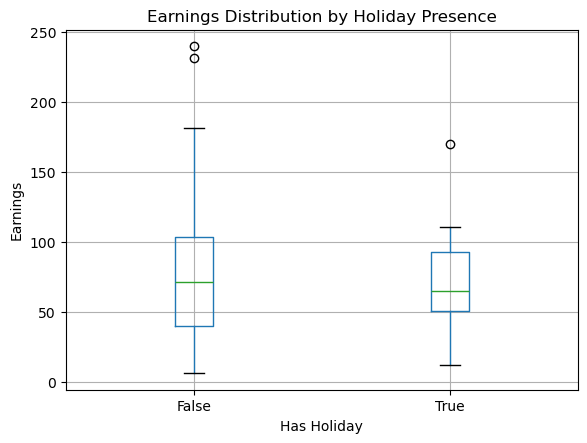

In [16]:
earnings_with_holidays_2023_df.boxplot(column='Amount', by='Has_Holiday')
plt.title('Earnings Distribution by Holiday Presence')
plt.suptitle('')
plt.xlabel('Has Holiday')
plt.ylabel('Earnings')
plt.show()

### Visualization Comparing Average Earnings Between Weeks with Holidays and those Without in 2023 and 2024

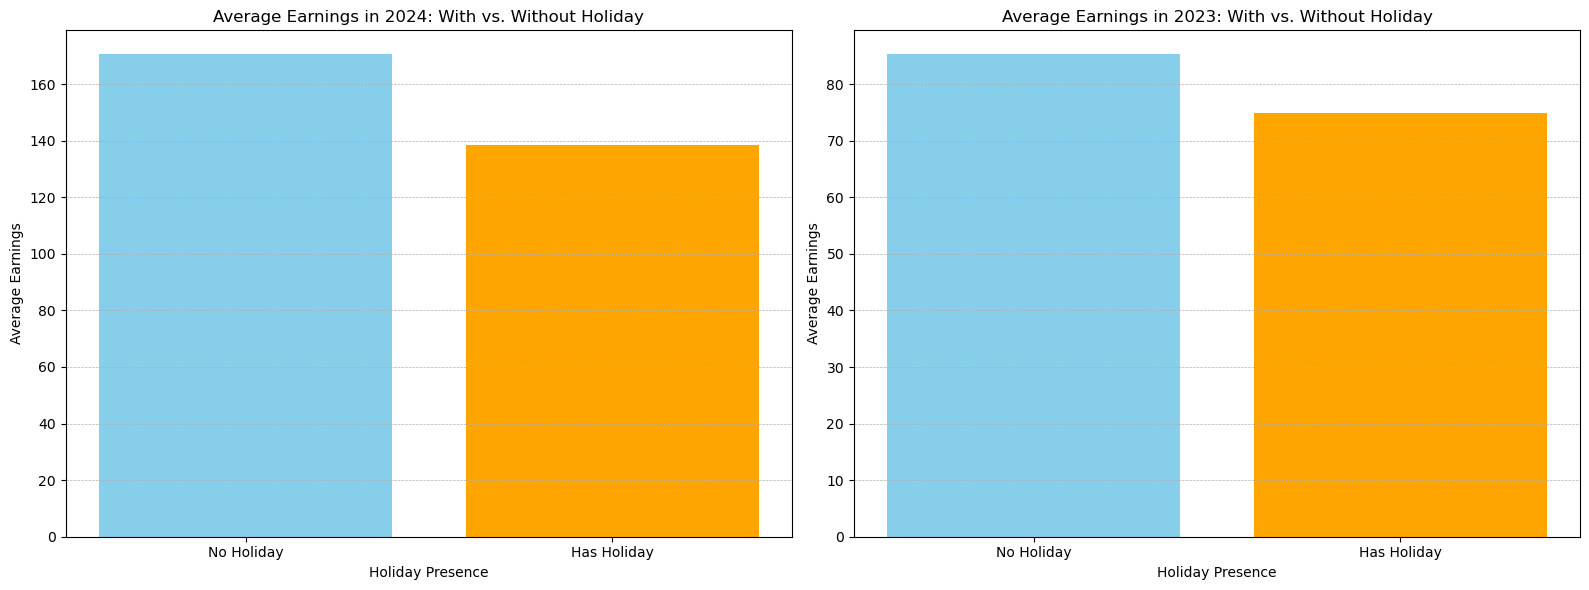

In [17]:
# Earnings by holiday status for 2024
earnings_by_holiday_2024 = earnings_with_holidays_2024_df.groupby('Has_Holiday')['Amount'].mean().reset_index()

# Earnings by holiday status for 2023
earnings_by_holiday_2023 = earnings_with_holidays_2023_df.groupby('Has_Holiday')['Amount'].mean().reset_index()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust the size for side-by-side plots

# Plot for 2024
axes[0].bar(['No Holiday', 'Has Holiday'], earnings_by_holiday_2024['Amount'], color=['skyblue', 'orange'])
axes[0].set_title('Average Earnings in 2024: With vs. Without Holiday')
axes[0].set_xlabel('Holiday Presence')
axes[0].set_ylabel('Average Earnings')
axes[0].grid(linestyle='--', linewidth=0.5, axis='y')

# Plot for 2023
axes[1].bar(['No Holiday', 'Has Holiday'], earnings_by_holiday_2023['Amount'], color=['skyblue', 'orange'])
axes[1].set_title('Average Earnings in 2023: With vs. Without Holiday')
axes[1].set_xlabel('Holiday Presence')
axes[1].set_ylabel('Average Earnings')
axes[1].grid(linestyle='--', linewidth=0.5, axis='y')

# Adjust layout to make sure plots fit without overlap
plt.tight_layout()

# Show the plots
plt.show()

#### Explaining the Results
- ##### 2024:
###### T-statistic: -1.2375 --> The negative value indicates that the earnings with holidays are lower on average than earnings without holidays, but the difference is not very large.
###### P-value: 0.2398 --> The P-value is much greater than 0.05, which means there is no statistically significant difference between earnings. We fail to reject the null hypothesis and conclude that any observed difference could be due to random chance.

- ##### 2023:
###### T-statistic: -0.6372 --> Again, the negative value indicates that earnings with holidays are lower than without holidays, but the difference is also not large.
###### P-value: 0.5304 --> Once again, we fail to reject the null hypothesis and conclude there is no meaningful difference in earnings between the two groups in 2023.


In [26]:
#-------------------------------------------
# Statistical Analysis for 2024
earnings_with_holiday_2024 = earnings_with_holidays_2024_df[earnings_with_holidays_2024_df['Has_Holiday']]['Amount']
earnings_without_holiday_2024 = earnings_with_holidays_2024_df[~earnings_with_holidays_2024_df['Has_Holiday']]['Amount']

t_stat_2024, p_val_2024 = stats.ttest_ind(earnings_with_holiday_2024, earnings_without_holiday_2024, equal_var=False)

print(f"2024 Earnings - T-test between With and Without Holidays:")
print(f"T-statistic: {t_stat_2024:.4f}, P-value: {p_val_2024:.4f}")

#-------------------------------------------
# Statistical Analysis for 2023
earnings_with_holiday_2023 = earnings_with_holidays_2023_df[earnings_with_holidays_2023_df['Has_Holiday']]['Amount']
earnings_without_holiday_2023 = earnings_with_holidays_2023_df[~earnings_with_holidays_2023_df['Has_Holiday']]['Amount']

t_stat_2023, p_val_2023 = stats.ttest_ind(earnings_with_holiday_2023, earnings_without_holiday_2023, equal_var=False)

print(f"\n2023 Earnings - T-test between With and Without Holidays:")
print(f"T-statistic: {t_stat_2023:.4f}, P-value: {p_val_2023:.4f}")

2024 Earnings - T-test between With and Without Holidays:
T-statistic: -1.2375, P-value: 0.2398

2023 Earnings - T-test between With and Without Holidays:
T-statistic: -0.6372, P-value: 0.5304


##### Time Series with Holiday Markers:

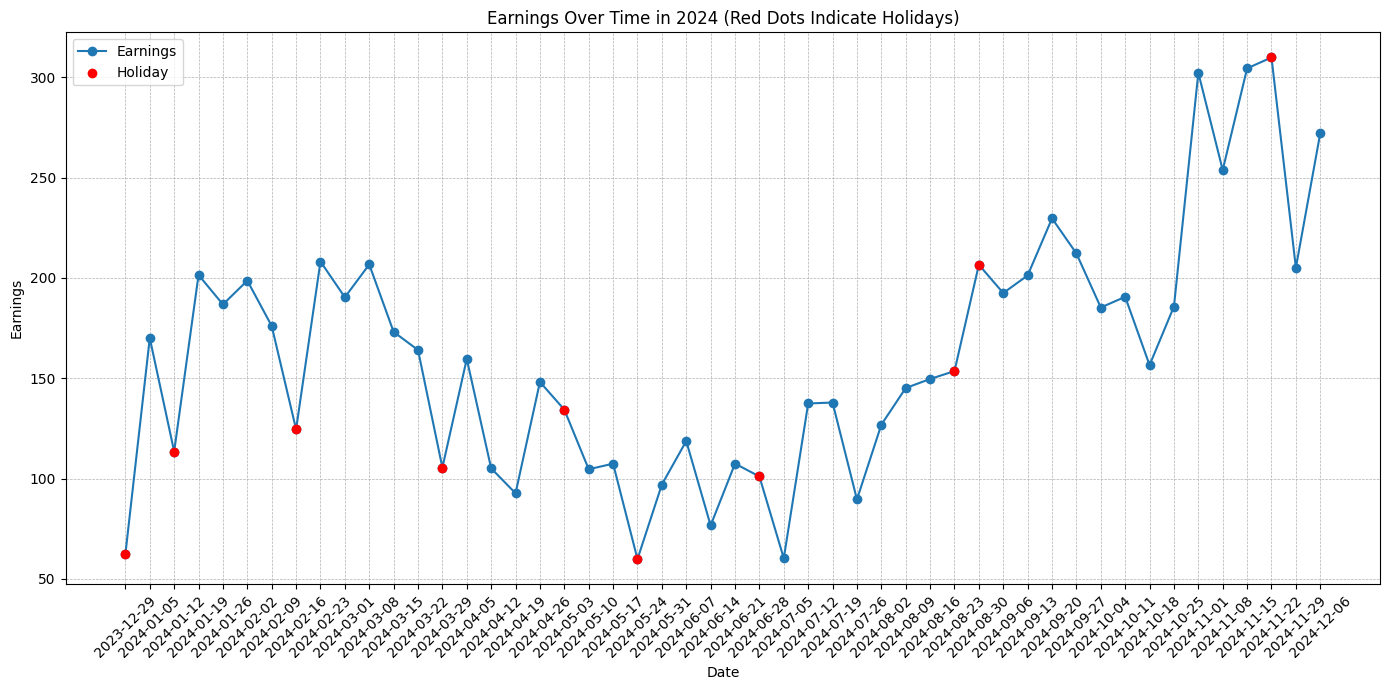

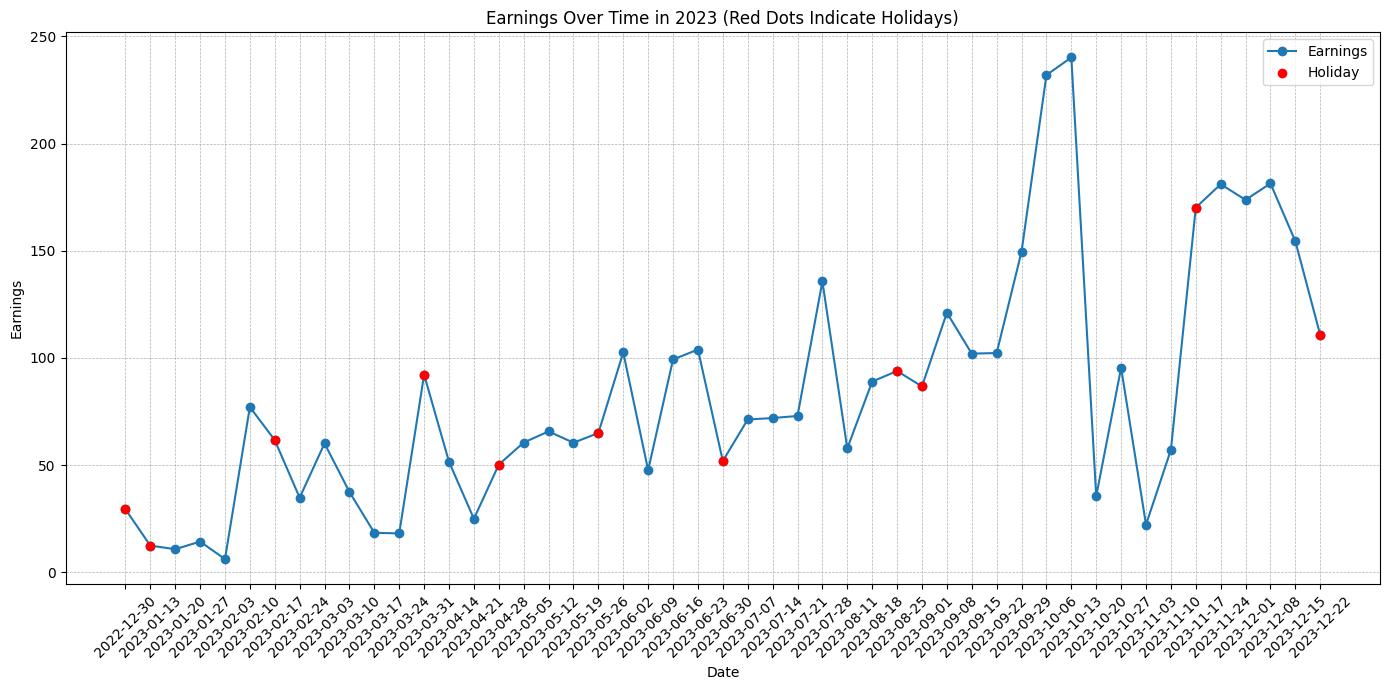

In [27]:
def plot_time_series_with_holidays(final_df, year):
    plt.figure(figsize=(14,7))
    plt.plot(final_df['Start_Date'], final_df['Amount'], marker='o', linestyle='-', label='Earnings')
    
    # Highlight points where there was a holiday
    holidays = final_df[final_df['Has_Holiday']]
    plt.scatter(holidays['Start_Date'], holidays['Amount'], color='red', label='Holiday', zorder=5)
    
    plt.title(f'Earnings Over Time in {year} (Red Dots Indicate Holidays)')
    plt.xlabel('Date')
    plt.ylabel('Earnings')
    plt.xticks(rotation=45)
    plt.grid(linestyle='--', linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot for 2024
plot_time_series_with_holidays(earnings_with_holidays_2024_df, 2024)

# Plot for 2023
plot_time_series_with_holidays(earnings_with_holidays_2023_df, 2023)

#### Analyze Lagged Holiday Effect

   Has_Holiday_Previous_Week  Average_Earnings
0                      False           162.429
1                       True           160.541


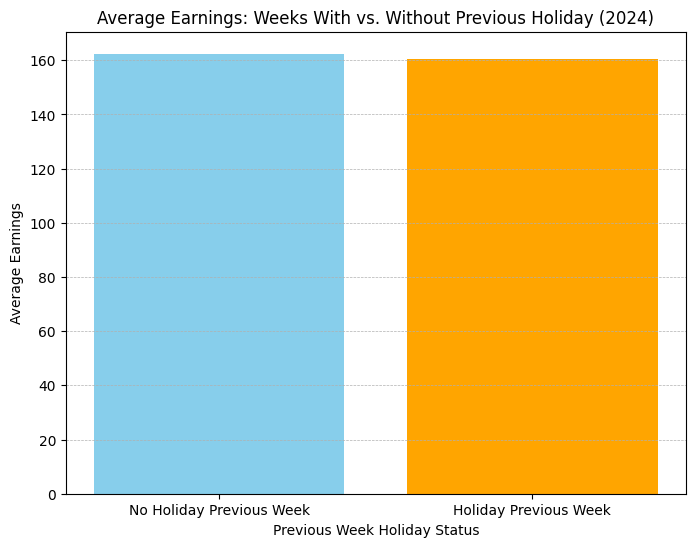

In [28]:
# Shift the Has_Holiday column by 1 to create a "previous week had a holiday" feature
earnings_with_holidays_2024_df['Has_Holiday_Previous_Week'] = earnings_with_holidays_2024_df['Has_Holiday'].shift(1, fill_value=False)

# Calculate average earnings grouped by the new feature
lagged_holiday_analysis = earnings_with_holidays_2024_df.groupby('Has_Holiday_Previous_Week')['Amount'].mean().reset_index()

# Rename columns for clarity
lagged_holiday_analysis.columns = ['Has_Holiday_Previous_Week', 'Average_Earnings']

print(lagged_holiday_analysis)

# Visualization
plt.figure(figsize=(8, 6))
plt.bar(
    ['No Holiday Previous Week', 'Holiday Previous Week'], 
    lagged_holiday_analysis['Average_Earnings'], 
    color=['skyblue', 'orange']
)
plt.title('Average Earnings: Weeks With vs. Without Previous Holiday (2024)')
plt.xlabel('Previous Week Holiday Status')
plt.ylabel('Average Earnings')
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.show()

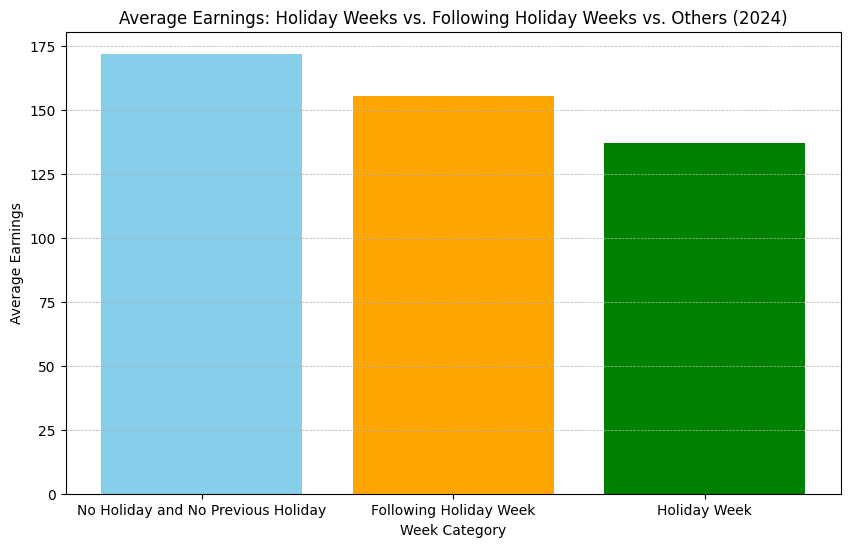

In [29]:
# Categorize weeks into three groups:
# 1. Weeks with holidays
# 2. Weeks following a holiday
# 3. Weeks with neither a holiday nor following a holiday

earnings_with_holidays_2024_df['Category'] = 'No Holiday and No Previous Holiday'
earnings_with_holidays_2024_df.loc[earnings_with_holidays_2024_df['Has_Holiday'], 'Category'] = 'Holiday Week'
earnings_with_holidays_2024_df.loc[
    ~earnings_with_holidays_2024_df['Has_Holiday'] & earnings_with_holidays_2024_df['Has_Holiday'].shift(1, fill_value=False),
    'Category'
] = 'Following Holiday Week'

# Calculate average earnings for each category
category_analysis = earnings_with_holidays_2024_df.groupby('Category')['Amount'].mean().reset_index()

# Sort the categories for consistent ordering in the visualization
category_order = ['No Holiday and No Previous Holiday', 'Following Holiday Week', 'Holiday Week']
category_analysis['Category'] = pd.Categorical(category_analysis['Category'], categories=category_order, ordered=True)
category_analysis = category_analysis.sort_values('Category')

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(category_analysis['Category'], category_analysis['Amount'], color=['skyblue', 'orange', 'green'])
plt.title('Average Earnings: Holiday Weeks vs. Following Holiday Weeks vs. Others (2024)')
plt.xlabel('Week Category')
plt.ylabel('Average Earnings')
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.show()

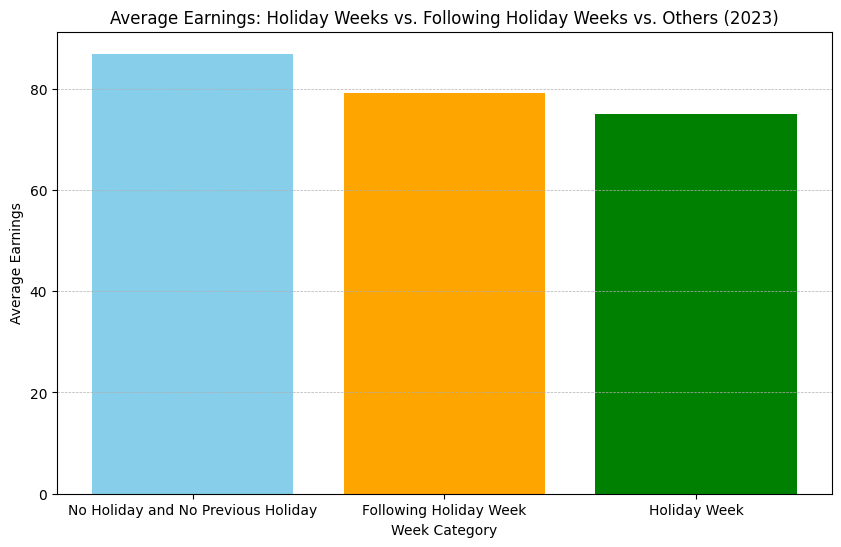

In [30]:
# Categorize weeks into three groups:
# 1. Weeks with holidays
# 2. Weeks following a holiday
# 3. Weeks with neither a holiday nor following a holiday

earnings_with_holidays_2023_df['Category'] = 'No Holiday and No Previous Holiday'
earnings_with_holidays_2023_df.loc[earnings_with_holidays_2023_df['Has_Holiday'], 'Category'] = 'Holiday Week'
earnings_with_holidays_2023_df.loc[
    ~earnings_with_holidays_2023_df['Has_Holiday'] & earnings_with_holidays_2023_df['Has_Holiday'].shift(1, fill_value=False),
    'Category'
] = 'Following Holiday Week'

# Calculate average earnings for each category
category_analysis_2023 = earnings_with_holidays_2023_df.groupby('Category')['Amount'].mean().reset_index()

# Sort the categories for consistent ordering in the visualization
category_order = ['No Holiday and No Previous Holiday', 'Following Holiday Week', 'Holiday Week']
category_analysis_2023['Category'] = pd.Categorical(category_analysis_2023['Category'], categories=category_order, ordered=True)
category_analysis_2023 = category_analysis_2023.sort_values('Category')

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(category_analysis_2023['Category'], category_analysis_2023['Amount'], color=['skyblue', 'orange', 'green'])
plt.title('Average Earnings: Holiday Weeks vs. Following Holiday Weeks vs. Others (2023)')
plt.xlabel('Week Category')
plt.ylabel('Average Earnings')
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.show()

c:\Users\aspec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aspec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aspec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


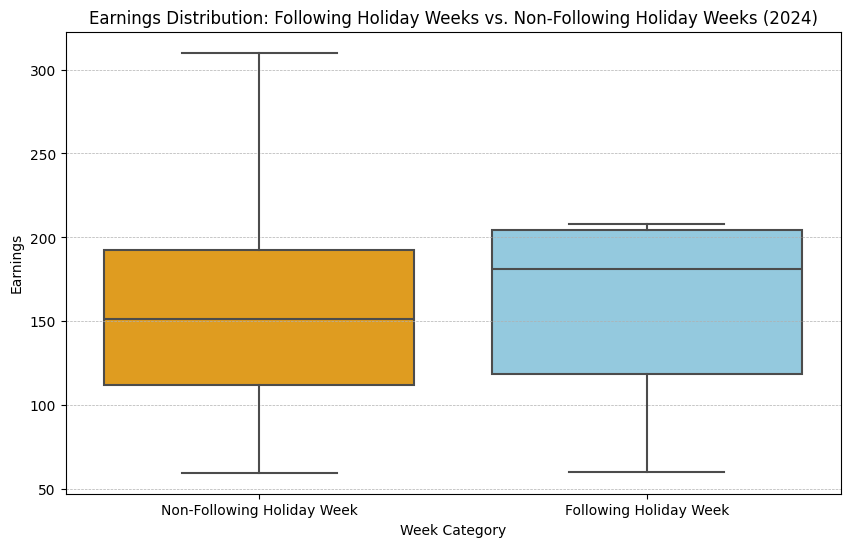

In [31]:
# Create a column to flag weeks following holidays
earnings_with_holidays_2024_df['Following_Holiday'] = earnings_with_holidays_2024_df['Has_Holiday'].shift(1, fill_value=False)

# Filter data into two categories
following_holiday_weeks = earnings_with_holidays_2024_df[earnings_with_holidays_2024_df['Following_Holiday']]
non_following_holiday_weeks = earnings_with_holidays_2024_df[~earnings_with_holidays_2024_df['Following_Holiday']]

# Add a categorical column for boxplot grouping
earnings_with_holidays_2024_df['Category'] = earnings_with_holidays_2024_df['Following_Holiday'].replace(
    {True: 'Following Holiday Week', False: 'Non-Following Holiday Week'}
)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=earnings_with_holidays_2024_df, x='Category', y='Amount', palette=['orange', 'skyblue'])
plt.title('Earnings Distribution: Following Holiday Weeks vs. Non-Following Holiday Weeks (2024)')
plt.xlabel('Week Category')
plt.ylabel('Earnings')
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.show()

c:\Users\aspec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aspec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aspec\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


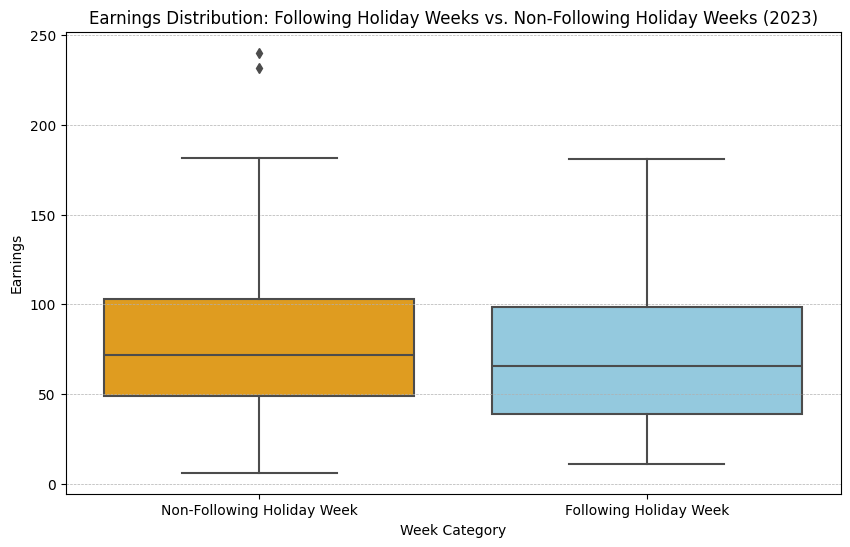

In [32]:
# Create a column to flag weeks following holidays for 2023
earnings_with_holidays_2023_df['Following_Holiday'] = earnings_with_holidays_2023_df['Has_Holiday'].shift(1, fill_value=False)

# Add a categorical column for boxplot grouping
earnings_with_holidays_2023_df['Category'] = earnings_with_holidays_2023_df['Following_Holiday'].replace(
    {True: 'Following Holiday Week', False: 'Non-Following Holiday Week'}
)

# Plot the boxplot for 2023
plt.figure(figsize=(10, 6))
sns.boxplot(data=earnings_with_holidays_2023_df, x='Category', y='Amount', palette=['orange', 'skyblue'])
plt.title('Earnings Distribution: Following Holiday Weeks vs. Non-Following Holiday Weeks (2023)')
plt.xlabel('Week Category')
plt.ylabel('Earnings')
plt.grid(linestyle='--', linewidth=0.5, axis='y')
plt.show()